## 🐼 Pandas 완전 정복: 실습 편 (Part 2 - Pandas 중고급)

Pandas의 중급 및 고급 기능을 다룹니다. 그룹화, 데이터 병합, 시계열 처리, 성능 최적화 및 시각화 기초를 학습합니다.

> **📁 데이터셋 준비**: 튜토리얼을 진행하기 전에 일부 연습 문제에서는 `datasets` 폴더의 데이터셋을 활용합니다. 데이터셋이 있는지 확인해주세요.

-----

### 목차 (Part 2)

6.  [그룹화와 집계 (`groupby`, `agg`, `pivot_table`)](https://www.google.com/search?q=%236-%EA%B7%B8%EB%A3%B9%ED%99%94%EC%99%80-%EC%A7%91%EA%B3%84-groupby-agg-pivot_table)
7.  [데이터 병합과 결합 (`merge`, `concat`, `join`)](https://www.google.com/search?q=%237-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%B3%91%ED%95%A9%EA%B3%BC-%EA%B2%B0%ED%95%A9-merge-concat-join)
8.  [시계열 데이터 처리 (`DatetimeIndex`, `resample`, `rolling`)](https://www.google.com/search?q=%238-%EC%8B%9C%EA%B3%84%EC%97%B4-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%B2%98%EB%A6%AC-datetimeindex-resample-rolling)
9.  [Pandas 성능 최적화](https://www.google.com/search?q=%239-pandas-%EC%84%B1%EB%8A%A5-%EC%B5%9C%EC%A0%81%ED%99%94)
10. [데이터 시각화 기초](https://www.google.com/search?q=%2310-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%8B%9C%EA%B0%81%ED%99%94-%EA%B8%B0%EC%B4%88)

-----


In [4]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np


### 6. 그룹화와 집계 (`groupby`, `agg`, `pivot_table`)

##### 💡 개념 (Concept)

데이터를 특정 기준에 따라 그룹으로 나누어 각 그룹별 통계량(합계, 평균, 개수 등)을 계산하는 것은 데이터 분석의 핵심 작업입니다.

  * **`groupby()`**: 데이터를 특정 컬럼(들)의 값에 따라 그룹으로 분할합니다.
      * 분할된 그룹 객체에 집계 함수 (`.sum()`, `.mean()`, `.count()`, `.max()`, `.min()`, `.std()`, `.var()`, `.first()`, `.last()`, `.nunique()`)를 적용하여 그룹별 결과를 얻을 수 있습니다.
  * **`agg()` (aggregate)**: `groupby()`와 함께 사용되어 여러 집계 함수를 동시에 적용하거나 사용자 정의 집계 함수를 사용할 수 있게 합니다.
      * 컬럼별로 다른 집계 함수를 적용할 수도 있습니다.
      * `df.groupby('그룹기준컬럼').agg({'집계대상컬럼1': 'sum', '집계대상컬럼2': 'mean'})`
  * **`pivot_table()`**: 엑셀의 피벗 테이블과 유사한 형태로 데이터를 재구성하여 요약합니다.
      * `pd.pivot_table(df, values='집계값컬럼', index='행인덱스컬럼', columns='열인덱스컬럼', aggfunc='집계함수')`
      * `aggfunc`의 기본값은 평균(`'mean'`)입니다.

##### 💻 예시 코드 (Example Code)

In [5]:
import pandas as pd
import numpy as np
import os

# datasets 폴더가 없으면 생성
if not os.path.exists('datasets'):
    os.makedirs('datasets')

# 예제 데이터 (sales_data_practice.csv 와 employees_practice.csv 재사용 또는 생성)
# Part 1의 예제 코드 실행으로 이미 생성되었다고 가정합니다.
# 만약 없다면 Part 1의 코드블록을 참조하여 생성해주세요.

# sales_data_practice.csv 내용 가정
data_sales = {
    'date': pd.to_datetime(['2024-01-01', '2024-01-01', '2024-01-02', '2024-01-02', '2024-01-03', '2024-01-03', '2024-01-04', '2024-01-04', '2024-01-01', '2024-01-02']),
    'region': ['서울', '부산', '서울', '인천', '부산', '서울', '인천', '부산', '인천', '부산'],
    'product': ['A', 'B', 'A', 'C', 'B', 'C', 'A', 'A', 'B', 'C'],
    'quantity': [10, 5, 8, 12, 7, 15, 9, 11, 6, 10],
    'unit_price': [1000, 2500, 1000, 1200, 2500, 1200, 1000, 1000, 2500, 1200]
}
df_s = pd.DataFrame(data_sales)
df_s['total_amount'] = df_s['quantity'] * df_s['unit_price']
# sales_csv_path = 'datasets/sales_data_practice.csv'
# df_s.to_csv(sales_csv_path, index=False, encoding='utf-8-sig')
# df_s = pd.read_csv(sales_csv_path, parse_dates=['date'])


# employees_practice.csv 내용 가정
data_employees = {
    '이름': ['민준', '서연', '도윤', '하은', '지호', '유나', '시윤', '지아'],
    '부서': ['영업', '마케팅', '개발', '영업', '개발', '마케팅', '개발', '영업'],
    '연봉': [4500, 5200, 6000, 4800, 5500, 5000, 7000, 4200],
    '나이': [30, 35, 28, 32, 29, 33, 38, 29],
    '도시': ['서울', '부산', '서울', '인천', '대전', '서울', '서울', '부산']
}
df_emp = pd.DataFrame(data_employees)
# emp_csv_path = 'datasets/employees_practice.csv'
# df_emp.to_csv(emp_csv_path, index=False, encoding='utf-8-sig')
# df_emp = pd.read_csv(emp_csv_path)

print("판매 데이터 샘플 (df_s):")
df_s.head(3)

판매 데이터 샘플 (df_s):


,date,region,product,quantity,unit_price,total_amount
0,2024-01-01,서울,A,10,1000,10000
1,2024-01-01,부산,B,5,2500,12500
2,2024-01-02,서울,A,8,1000,8000


In [6]:
print("직원 데이터 샘플 (df_emp):")
df_emp.head(3)

직원 데이터 샘플 (df_emp):


,이름,부서,연봉,나이,도시
0,민준,영업,4500,30,서울
1,서연,마케팅,5200,35,부산
2,도윤,개발,6000,28,서울


In [7]:
# 지역(region)별 총 판매량(quantity) 합계
region_quantity_sum = df_s.groupby('region')['quantity'].sum()
print("지역별 총 판매량:")
region_quantity_sum

지역별 총 판매량:


,quantity
region,
부산,33
서울,33
인천,27


In [8]:
# 부서(부서)별 평균 연봉(연봉)
dept_avg_salary = df_emp.groupby('부서')['연봉'].mean()
print("부서별 평균 연봉:")
dept_avg_salary

부서별 평균 연봉:


,연봉
부서,
개발,6166.666667
마케팅,5100.000000
영업,4500.000000


In [9]:
# 여러 기준으로 그룹화: 지역(region) 및 제품(product)별 평균 총 판매액(total_amount)
region_product_avg_sales = df_s.groupby(['region', 'product'])['total_amount'].mean()
print("지역 및 제품별 평균 총 판매액:")
region_product_avg_sales

지역 및 제품별 평균 총 판매액:


region  product
부산      A          11000.0
        B          15000.0
        C          12000.0
서울      A           9000.0
        C          18000.0
인천      A           9000.0
        B          15000.0
        C          14400.0
Name: total_amount, dtype: float64

In [10]:
# 지역(region)별로 판매량(quantity)의 합계와 평균, 총 판매액(total_amount)의 합계 구하기
region_agg = df_s.groupby('region').agg(
    total_quantity=('quantity', 'sum'),
    avg_quantity=('quantity', 'mean'),
    total_sales_amount=('total_amount', 'sum')
)
print("지역별 판매량 합계/평균, 총 판매액 합계 (agg 사용):")
region_agg

지역별 판매량 합계/평균, 총 판매액 합계 (agg 사용):


,total_quantity,avg_quantity,total_sales_amount
region,,,
부산,33,8.25,53000
서울,33,11.00,36000
인천,27,9.00,38400


In [11]:
# 부서(부서)별 연봉(연봉)의 최대값, 최소값 및 직원 수(이름 개수)
dept_salary_stats = df_emp.groupby('부서').agg(
    max_salary=('연봉', 'max'),
    min_salary=('연봉', 'min'),
    num_employees=('이름', 'count')
)
print("부서별 연봉 최대/최소 및 직원 수:")
dept_salary_stats

부서별 연봉 최대/최소 및 직원 수:


,max_salary,min_salary,num_employees
부서,,,
개발,7000,5500,3
마케팅,5200,5000,2
영업,4800,4200,3


In [12]:
# 지역(region)을 행으로, 제품(product)을 열로 하여 총 판매량(quantity)의 합계 보기
sales_pivot_quantity = pd.pivot_table(df_s, values='quantity', index='region', columns='product', aggfunc='sum', fill_value=0)
print("피벗 테이블: 지역별, 제품별 총 판매량 (합계):")
sales_pivot_quantity

피벗 테이블: 지역별, 제품별 총 판매량 (합계):


product,A,B,C
region,,,
부산,11,12,10
서울,18,0,15
인천,9,6,12


In [13]:
# 부서(부서)를 행으로, 도시(도시)를 열로 하여 평균 연봉(연봉) 보기
emp_pivot_salary = pd.pivot_table(df_emp, values='연봉', index='부서', columns='도시', aggfunc='mean') # aggfunc 기본값은 mean
print("피벗 테이블: 부서별, 도시별 평균 연봉:")
emp_pivot_salary

피벗 테이블: 부서별, 도시별 평균 연봉:


도시,대전,부산,서울,인천
부서,,,,
개발,5500.0,NaN,6500.0,NaN
마케팅,NaN,5200.0,5000.0,NaN
영업,NaN,4200.0,4500.0,4800.0


##### ✏️ 연습 문제 (Practice Problems)
1. df_emp (직원 데이터)를 사용하여, '도시'별로 가장 높은 '연봉'과 가장 낮은 '연봉', 그리고 평균 '나이'를 계산하여 출력하세요.


In [14]:
# 연습 문제 1번 풀이 공간

  2. df_s (판매 데이터)를 사용하여, pivot_table을 만들어 각 '제품(product)'별로 '지역(region)'에 따른 '총 판매액(total_amount)'의 평균을 나타내세요. (결측값은 0으로 채우세요)

In [15]:
# 연습 문제 2번 풀이 공간

  3. df_s 데이터를 'date'별로 그룹화한 후, 각 날짜별 총 'quantity'와 고유 'product' 개수를 agg를 사용하여 계산하세요.

In [16]:
# 연습 문제 3번 풀이 공간

-----

### 7\. 데이터 병합과 결합 (`merge`, `concat`, `join`)

##### 💡 개념 (Concept)

여러 개의 DataFrame을 특정 기준에 따라 합치는 작업은 데이터를 풍부하게 만드는 데 중요합니다.

  * **`pd.merge()`**: SQL의 JOIN 연산과 유사하게, 하나 이상의 공통된 키(컬럼)를 기준으로 두 DataFrame을 병합합니다.
      * `pd.merge(df_left, df_right, on='공통컬럼', how='병합방식')`
      * `how` 옵션:
          * `'inner'` (기본값): 양쪽 DataFrame에 모두 존재하는 키만 포함.
          * `'left'`: 왼쪽 DataFrame의 모든 키를 포함 (오른쪽에 없으면 NaN).
          * `'right'`: 오른쪽 DataFrame의 모든 키를 포함 (왼쪽에 없으면 NaN).
          * `'outer'`: 양쪽 DataFrame의 모든 키를 포함 (한쪽에만 있으면 NaN).
      * `left_on`, `right_on`: 양쪽 DataFrame의 키 컬럼명이 다를 경우 각각 지정.
      * `left_index=True`, `right_index=True`: 인덱스를 기준으로 병합.
  * **`pd.concat()`**: 여러 DataFrame을 단순히 행(세로) 또는 열(가로) 방향으로 이어 붙입니다.
      * `pd.concat([df1, df2, ...], axis=0)` (기본값, 행 방향으로 연결)
      * `pd.concat([df1, df2, ...], axis=1)` (열 방향으로 연결, 인덱스 기준으로 정렬)
      * `ignore_index=True`: 기존 인덱스를 무시하고 새로운 0부터 시작하는 인덱스를 생성.
  * **`DataFrame.join()`**: `merge()`와 유사하지만, 주로 인덱스를 기준으로 다른 DataFrame(들)을 병합할 때 편리하게 사용됩니다. `merge()`의 기능 중 일부를 더 간결하게 제공합니다.
      * `df_left.join(df_right, on='컬럼명', how='left')` (왼쪽 df의 '컬럼명'과 오른쪽 df의 인덱스를 기준으로 병합)
      * 기본적으로 왼쪽 조인(`how='left'`)을 수행하며, 인덱스 대 인덱스 조인이 기본입니다.

##### 💻 예시 코드 (Example Code)

In [17]:
import pandas as pd

# 예제 DataFrame 생성
df_info = pd.DataFrame({
    '직원ID': [101, 102, 103, 104, 105],
    '이름': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    '부서ID': [10, 20, 10, 30, 20]
})
print("직원 정보 (df_info):")
df_info

직원 정보 (df_info):


,직원ID,이름,부서ID
0,101,Alice,10
1,102,Bob,20
2,103,Charlie,10
3,104,David,30
4,105,Eva,20


In [18]:
df_dept = pd.DataFrame({
    '부서코드': [10, 20, 40],
    '부서명': ['인사팀', '개발팀', '마케팅팀'],
    '위치': ['본관 A동', '본관 B동', '별관 C동']
})
print("\n부서 정보 (df_dept):")
df_dept


부서 정보 (df_dept):


,부서코드,부서명,위치
0,10,인사팀,본관 A동
1,20,개발팀,본관 B동
2,40,마케팅팀,별관 C동


In [19]:
# Inner merge: 공통된 부서ID/부서코드를 기준으로 병합
merged_inner = pd.merge(df_info, df_dept, left_on='부서ID', right_on='부서코드', how='inner')
print("Inner Merge 결과:")
merged_inner

Inner Merge 결과:


,직원ID,이름,부서ID,부서코드,부서명,위치
0,101,Alice,10,10,인사팀,본관 A동
1,102,Bob,20,20,개발팀,본관 B동
2,103,Charlie,10,10,인사팀,본관 A동
3,105,Eva,20,20,개발팀,본관 B동


In [20]:
# Left merge: df_info의 모든 직원을 포함
merged_left = pd.merge(df_info, df_dept, left_on='부서ID', right_on='부서코드', how='left')
print("Left Merge 결과:")
merged_left

Left Merge 결과:


,직원ID,이름,부서ID,부서코드,부서명,위치
0,101,Alice,10,10.0,인사팀,본관 A동
1,102,Bob,20,20.0,개발팀,본관 B동
2,103,Charlie,10,10.0,인사팀,본관 A동
3,104,David,30,NaN,NaN,NaN
4,105,Eva,20,20.0,개발팀,본관 B동


In [21]:
# Outer merge: 모든 직원과 모든 부서를 포함
merged_outer = pd.merge(df_info, df_dept, left_on='부서ID', right_on='부서코드', how='outer')
print("Outer Merge 결과:")
merged_outer

Outer Merge 결과:


,직원ID,이름,부서ID,부서코드,부서명,위치
0,101.0,Alice,10.0,10.0,인사팀,본관 A동
1,103.0,Charlie,10.0,10.0,인사팀,본관 A동
2,102.0,Bob,20.0,20.0,개발팀,본관 B동
3,105.0,Eva,20.0,20.0,개발팀,본관 B동
4,104.0,David,30.0,NaN,NaN,NaN
5,NaN,NaN,NaN,40.0,마케팅팀,별관 C동


In [22]:
df1_concat = pd.DataFrame({'A': ['A0', 'A1'], 'B': ['B0', 'B1']})
df2_concat = pd.DataFrame({'A': ['A2', 'A3'], 'B': ['B2', 'B3']})
print("df1_concat:\n", df1_concat)
print("df2_concat:\n", df2_concat)

df1_concat:
     A   B
0  A0  B0
1  A1  B1
df2_concat:
     A   B
0  A2  B2
1  A3  B3


In [23]:
# 행 방향으로 concat (기본값 axis=0)
concatenated_rows = pd.concat([df1_concat, df2_concat])
print("행 방향 Concat 결과 (기존 인덱스 유지):")
concatenated_rows

행 방향 Concat 결과 (기존 인덱스 유지):


,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


In [24]:
# 행 방향으로 concat (인덱스 재설정)
concatenated_rows_new_index = pd.concat([df1_concat, df2_concat], ignore_index=True)
print("행 방향 Concat 결과 (ignore_index=True):")
concatenated_rows_new_index

행 방향 Concat 결과 (ignore_index=True):


,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


In [25]:
df3_concat = pd.DataFrame({'C': ['C0', 'C1'], 'D': ['D0', 'D1']}, index=[0, 1])
print("df3_concat:\n", df3_concat)

df3_concat:
     C   D
0  C0  D0
1  C1  D1


In [26]:
# 열 방향으로 concat (axis=1)
concatenated_cols = pd.concat([df1_concat, df3_concat], axis=1)
print("열 방향 Concat 결과:")
concatenated_cols

열 방향 Concat 결과:


,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1


In [27]:
df_left_join = pd.DataFrame({
    '이름': ['Alice', 'Bob', 'Charlie'],
    '부서ID_key': [10, 20, 10]
}, index=['L0', 'L1', 'L2'])
df_left_join

,이름,부서ID_key
L0,Alice,10
L1,Bob,20
L2,Charlie,10


In [28]:
df_right_join = pd.DataFrame({
    '부서명': ['인사팀', '개발팀', '재무팀'],
    '위치': ['본관A', '본관B', '본관C']
}, index=[10, 20, 30]) # 인덱스가 부서ID 역할
df_right_join

,부서명,위치
10,인사팀,본관A
20,개발팀,본관B
30,재무팀,본관C


In [29]:
# df_left_join의 '부서ID_key' 컬럼과 df_right_join의 인덱스를 기준으로 조인
joined_df = df_left_join.join(df_right_join, on='부서ID_key', how='left')
print("join 결과 (left_on='부서ID_key', right_index=True 와 유사):")
joined_df

join 결과 (left_on='부서ID_key', right_index=True 와 유사):


,이름,부서ID_key,부서명,위치
L0,Alice,10,인사팀,본관A
L1,Bob,20,개발팀,본관B
L2,Charlie,10,인사팀,본관A


  ##### ✏️ 연습 문제 (Practice Problems) #####
  1. df_emp (직원 데이터)와 다음과 같은 df_projects (프로젝트 할당 정보) DataFrame을 만드세요.

  ```python
  data_projects = {
          '직원명': ['민준', '도윤', '유나', '시윤', '재인'], # '재인'은 df_emp에 없는 직원
          '프로젝트명': ['알파', '베타', '감마', '델타', '오메가'],
          '역할': ['PM', '개발자', '디자이너', '분석가', '테스터']
      }
  df_projects = pd.DataFrame(data_projects)
  ```
  두 DataFrame을 '이름'과 '직원명'을 기준으로 **외부 조인(outer join)**하여 모든 직원과 모든 프로젝트 정보가 포함된 결과를 만드세요.

In [30]:
# 연습 문제 1번 데이터 생성

  2.  다음 두 DataFrame `df_sales_q1`과 `df_sales_q2`를 만드세요.
```python
df_sales_q1 = pd.DataFrame({
    '제품': ['A', 'B', 'C'],
    '1분기판매량': [100, 150, 90]
})
df_sales_q2 = pd.DataFrame({
    '제품': ['A', 'B', 'D'], # C제품 누락, D제품 추가
    '2분기판매량': [120, 130, 70]
})
```
이 두 DataFrame을 pd.concat()을 사용하여 열 방향으로 합치되, '제품' 컬럼을 기준으로 정렬되도록하고, 합쳐진 결과에서 인덱스가 중복되지 않도록 하세요. (힌트: set_index 후 concat 또는 merge 활용)

In [31]:
# 연습 문제 2번 데이터 생성

3.  `df_info` (직원 기본 정보)와 `df_dept` (부서 정보, '부서코드'가 인덱스)를 `join`을 사용하여 병합하되, `df_info`의 '부서ID'를 기준으로 하고, 부서 정보가 없는 직원은 제외되도록(inner join 방식) 병합하세요. (힌트: `df_dept`의 인덱스를 활용)

<!-- end list -->

In [32]:
# 연습 문제 3번 데이터 생성
# df_info, df_dept는 이전 예제에서 생성된 것을 활용
# df_dept_indexed = df_dept.set_index('부서코드') # 필요시 인덱스 설정

-----

### 8\. 시계열 데이터 처리 (`DatetimeIndex`, `resample`, `rolling`)

##### 💡 개념 (Concept)

Pandas는 시계열 데이터를 다루는 데 매우 강력한 기능을 제공합니다. 시간 기반의 인덱싱, 기간 변환, 이동창 연산 등이 가능합니다.

  * **`DatetimeIndex`**: 시간 정보를 나타내는 인덱스입니다. `pd.to_datetime()` 함수를 사용하여 문자열이나 다른 형태의 날짜/시간 데이터를 `DatetimeIndex` 또는 Series로 변환할 수 있습니다.
      * 생성된 Datetime 객체에서는 `.dt` 접근자를 사용하여 년(`.dt.year`), 월(`.dt.month`), 일(`.dt.day`), 요일(`.dt.dayofweek` 또는 `.dt.weekday`), 시간(`.dt.hour`) 등 다양한 시간 관련 속성을 추출할 수 있습니다.
  * **`resample()`**: 시계열 데이터의 빈도를 변경(재표본화)합니다. 예를 들어, 일별 데이터를 월별 데이터로 집계할 수 있습니다.
      * `df.resample('빈도규칙').집계함수()`
      * 빈도 규칙 예시: `'D'`(일), `'W'`(주), `'M'`(월말), `'MS'`(월초), `'Q'`(분기말), `'QS'`(분기초), `'A'`(연말), `'AS'`(연초), `'H'`(시간), `'T'` 또는 `'min'`(분), `'S'`(초) 등.
  * **`rolling()`**: 고정된 크기의 이동창(moving window)을 만들어 데이터를 순회하면서 통계량을 계산합니다.
      * `df['컬럼'].rolling(window=창크기).집계함수()`
      * 예: 이동 평균(moving average), 이동 합계(moving sum) 등.
      * `center=True` 옵션은 창의 중심에 레이블을 위치시킵니다.
      * `min_periods` 옵션은 계산에 필요한 최소 관측치 수를 지정합니다.

##### 💻 예시 코드 (Example Code)

In [33]:
import pandas as pd
import numpy as np

# 시계열 데이터 생성 (df_s 재활용 또는 새로 생성)
# Part 2의 6번 항목에서 생성한 df_s를 사용하거나, 아래와 같이 재생성
data_ts = {
    'date': pd.to_datetime(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-10', '2024-01-11',
                           '2024-02-01', '2024-02-02', '2024-02-15', '2024-03-01']),
    'value': [10, 12, 15, 13, 18, 20, 22, 25, 28]
}
df_ts = pd.DataFrame(data_ts)
df_ts = df_ts.set_index('date') # 'date' 컬럼을 DatetimeIndex로 설정
print("시계열 데이터 (df_ts):")
df_ts

시계열 데이터 (df_ts):


,value
date,
2024-01-01,10
2024-01-02,12
2024-01-03,15
2024-01-10,13
2024-01-11,18
2024-02-01,20
2024-02-02,22
2024-02-15,25
2024-03-01,28


In [34]:
# df_s (판매 데이터)를 사용하여 DatetimeIndex 속성 확인
# df_s의 인덱스가 DatetimeIndex가 아닐 경우 변환: df_s.index = pd.to_datetime(df_s.index)
# 여기서는 df_ts의 인덱스를 사용합니다.
print("df_ts 인덱스 타입:", type(df_ts.index))

df_ts 인덱스 타입: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


```
df_ts 인덱스 타입: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
```

In [35]:
# 새로운 날짜 컬럼을 가진 DataFrame으로 .dt 접근자 시연
df_with_date_col = pd.DataFrame({
    'event_date': pd.to_datetime(['2024-05-01 10:30:00', '2024-05-05 14:00:15', '2024-06-10 08:00:00']),
    'event_name': ['Meeting A', 'Workshop B', 'Conference C']
})
print("이벤트 데이터:")
df_with_date_col

이벤트 데이터:


,event_date,event_name
0,2024-05-01 10:30:00,Meeting A
1,2024-05-05 14:00:15,Workshop B
2,2024-06-10 08:00:00,Conference C


In [36]:
df_with_date_col['year'] = df_with_date_col['event_date'].dt.year
df_with_date_col['month'] = df_with_date_col['event_date'].dt.month
df_with_date_col['day'] = df_with_date_col['event_date'].dt.day
df_with_date_col['hour'] = df_with_date_col['event_date'].dt.hour
df_with_date_col['day_of_week'] = df_with_date_col['event_date'].dt.day_name() # 요일 이름
print(".dt 접근자로 날짜/시간 성분 추출:")
df_with_date_col[['event_date', 'year', 'month', 'day', 'hour', 'day_of_week']]

.dt 접근자로 날짜/시간 성분 추출:


,event_date,year,month,day,hour,day_of_week
0,2024-05-01 10:30:00,2024,5,1,10,Wednesday
1,2024-05-05 14:00:15,2024,5,5,14,Sunday
2,2024-06-10 08:00:00,2024,6,10,8,Monday


In [37]:
# 월별(Month Start 'MS') 평균 value 계산
monthly_avg_value = df_ts['value'].resample('MS').mean()
print("월별 평균 value (resample 'MS'):")
monthly_avg_value

월별 평균 value (resample 'MS'):


,value
date,
2024-01-01,13.600000
2024-02-01,22.333333
2024-03-01,28.000000


In [38]:
# 주별(Weekly 'W-MON', 월요일 기준) value 합계 계산
weekly_sum_value = df_ts['value'].resample('W-MON').sum()
print("주별 합계 value (resample 'W-MON'):")
weekly_sum_value

주별 합계 value (resample 'W-MON'):


,value
date,
2024-01-01,10
2024-01-08,27
2024-01-15,31
2024-01-22,0
2024-01-29,0
2024-02-05,42
2024-02-12,0
2024-02-19,25
2024-02-26,0


In [39]:
# 3개 기간(일) 이동 평균 계산 (창 크기=3)
df_ts['value_rolling_mean_3'] = df_ts['value'].rolling(window=3).mean()
print("3일 이동 평균 (rolling window=3):")
df_ts

3일 이동 평균 (rolling window=3):


,value,value_rolling_mean_3
date,,
2024-01-01,10,NaN
2024-01-02,12,NaN
2024-01-03,15,12.333333
2024-01-10,13,13.333333
2024-01-11,18,15.333333
2024-02-01,20,17.000000
2024-02-02,22,20.000000
2024-02-15,25,22.333333
2024-03-01,28,25.000000


In [40]:
# 최소 2개의 관측치가 있어야 계산되는 3일 이동 평균
df_ts['value_rolling_mean_3_min2'] = df_ts['value'].rolling(window=3, min_periods=2).mean()
print("3일 이동 평균 (min_periods=2):")
df_ts[['value', 'value_rolling_mean_3_min2']]

3일 이동 평균 (min_periods=2):


,value,value_rolling_mean_3_min2
date,,
2024-01-01,10,NaN
2024-01-02,12,11.000000
2024-01-03,15,12.333333
2024-01-10,13,13.333333
2024-01-11,18,15.333333
2024-02-01,20,17.000000
2024-02-02,22,20.000000
2024-02-15,25,22.333333
2024-03-01,28,25.000000


#### ✏️ 연습 문제 (Practice Problems) ####
1. df_s (판매 데이터, Part 2의 6번 항목에서 생성/가정한 데이터)의 'date' 컬럼을 인덱스로 설정하세요. 그 후, 각 월별('MS')로 'total_amount'의 합계와 'quantity'의 평균을 계산하여 출력하세요.

In [41]:
# 연습 문제 1번 풀이 공간
# df_s는 이전 예제에서 생성됨

2. df_ts (시계열 예제 데이터)에 대해, 2개 기간의 이동 합계(rolling(window=2).sum())를 계산하여 'value_rolling_sum_2'라는 새 컬럼으로 추가하고 결과를 출력하세요.

In [42]:
# 연습 문제 2번 풀이 공간
# df_ts는 이전 예제에서 생성됨

3. df_with_date_col (이벤트 데이터)에서 'event_date'가 주말(토요일 또는 일요일)인 이벤트만 필터링하여 출력하세요. (힌트: .dt.dayofweek는 월요일=0, ..., 일요일=6)

In [43]:
# 연습 문제 3번 풀이 공간
# df_with_date_col은 이전 예제에서 생성됨

-----

### 9\. Pandas 성능 최적화

##### 💡 개념 (Concept)

대용량 데이터를 다룰 때 Pandas의 연산 속도와 메모리 사용량은 중요한 고려 사항입니다. 몇 가지 기법을 통해 성능을 개선할 수 있습니다.

  * **데이터 타입 최적화 (`astype()`)**:
      * 숫자형 데이터: 실제 값의 범위에 맞는 더 작은 크기의 데이터 타입으로 변경 (예: `int64` -\> `int32`, `int16`; `float64` -\> `float32`).
      * 문자열 데이터: 고유한 값이 적은 문자열 컬럼은 `category` 타입으로 변경하여 메모리 사용량을 크게 줄이고 연산 속도를 향상시킬 수 있습니다.
  * **PyArrow 백엔드 사용 (`pd.options.mode.string_storage = "pyarrow"`)**:
      * Pandas 2.0부터 Apache Arrow를 문자열 데이터의 백엔드로 사용할 수 있게 되어, 문자열 처리 성능과 메모리 효율성을 크게 향상시킬 수 있습니다.
      * `pd.options.mode.string_storage = "pyarrow"` 로 설정하거나, Series/DataFrame 생성 시 `dtype="string[pyarrow]"` 로 지정합니다.
      * PyArrow 라이브러리가 설치되어 있어야 합니다: `pip install pyarrow`.
  * **벡터화 연산 활용**: Pandas의 많은 함수는 내부적으로 C 또는 Cython으로 구현되어 있어, 반복문 대신 이러한 벡터화된 연산을 사용하는 것이 훨씬 빠릅니다. (예: `df['A'] + df['B']` vs. `for` 루프)
  * **`query()` 및 `eval()` 사용**: 대규모 DataFrame에서 특정 조건에 맞는 데이터를 선택하거나 복잡한 연산을 수행할 때, 내부적으로 최적화된 엔진(Numexpr)을 사용하여 일반적인 파이썬 연산보다 빠를 수 있습니다. (메모리 사용량도 줄일 수 있음)

##### 💻 예시 코드 (Example Code)

**데이터 타입 최적화**

In [44]:
import pandas as pd
import numpy as np

# 예제 DataFrame 생성 (큰 데이터 가정)
data_large = {
    'id': np.arange(1, 100001),
    'value_float': np.random.rand(100000) * 1000,
    'value_int': np.random.randint(0, 1000, size=100000),
    'category_str': np.random.choice(['TypeA', 'TypeB', 'TypeC', 'TypeD', 'TypeE'], size=100000)
}
df_large_orig = pd.DataFrame(data_large)
print("원본 DataFrame 메모리 사용량 (MB):")
print(df_large_orig.memory_usage(deep=True).sum() / (1024**2))
print("\n원본 DataFrame dtypes:")
print(df_large_orig.dtypes)

원본 DataFrame 메모리 사용량 (MB):
8.201725006103516

원본 DataFrame dtypes:
id                int64
value_float     float64
value_int         int64
category_str     object
dtype: object


In [45]:
df_large_optimized = df_large_orig.copy()

# float64 -> float32
df_large_optimized['value_float'] = df_large_optimized['value_float'].astype('float32')
# int32 -> int16 (값이 0-1000 범위이므로 가능)
df_large_optimized['value_int'] = df_large_optimized['value_int'].astype('int16')
# object -> category
df_large_optimized['category_str'] = df_large_optimized['category_str'].astype('category')

print("최적화 후 DataFrame 메모리 사용량 (MB):")
print(df_large_optimized.memory_usage(deep=True).sum() / (1024**2))
print("\n최적화 후 DataFrame dtypes:")
print(df_large_optimized.dtypes)

최적화 후 DataFrame 메모리 사용량 (MB):
1.4310970306396484

최적화 후 DataFrame dtypes:
id                 int64
value_float      float32
value_int          int16
category_str    category
dtype: object


In [46]:
# # PyArrow 설치 필요:
!pip install pyarrow

In [47]:
try:
    import pyarrow
    # 전역적으로 PyArrow 문자열 저장소 사용 설정 (Pandas 2.x 이상)
    # pd.options.mode.string_storage = "pyarrow"
    # 또는 Series/DataFrame 생성 시 명시적으로 지정

    s_object = pd.Series(['apple', 'banana', 'apple', 'orange', 'banana', 'apple'] * 10000)
    s_string_arrow = pd.Series(['apple', 'banana', 'apple', 'orange', 'banana', 'apple'] * 10000, dtype="string[pyarrow]")
    # s_string_default = pd.Series(['apple', 'banana', 'apple', 'orange', 'banana', 'apple'] * 10000, dtype="string") # Pandas 1.x string

    print(f"\nObject Series 메모리 (MB): {s_object.memory_usage(deep=True) / (1024**2):.4f}")
    # print(f"Default String Series 메모리 (MB): {s_string_default.memory_usage(deep=True) / (1024**2):.4f}")
    print(f"PyArrow String Series 메모리 (MB): {s_string_arrow.memory_usage(deep=True) / (1024**2):.4f}")

    # pd.options.mode.string_storage = "python" # 기본값으로 되돌리기 (필요시)
except ImportError:
    print("PyArrow 라이브러리가 설치되지 않았습니다. (pip install pyarrow)")


Object Series 메모리 (MB): 3.5764
PyArrow String Series 메모리 (MB): 0.7726


In [48]:
# 간단한 query 예시 (복습)
# df_s는 Part 2의 6번 항목에서 생성된 판매 데이터
result_query = df_s.query('region == "서울" and quantity > 8')
print("query 결과 (서울 지역, 판매량 8 초과):")
result_query.head()

query 결과 (서울 지역, 판매량 8 초과):


,date,region,product,quantity,unit_price,total_amount
0,2024-01-01,서울,A,10,1000,10000
5,2024-01-03,서울,C,15,1200,18000


In [49]:
# eval 예시: 새로운 컬럼 계산
df_eval_test = pd.DataFrame(np.random.rand(1000, 3), columns=['A', 'B', 'C'])
df_eval_test.eval('D = (A + B) / C', inplace=True)
print("eval을 사용한 새 컬럼 D 생성:")
df_eval_test.head()

eval을 사용한 새 컬럼 D 생성:


,A,B,C,D
0,0.566387,0.940035,0.829713,1.815594
1,0.392881,0.463562,0.958458,0.893564
2,0.785029,0.338356,0.241535,4.651025
3,0.873217,0.382834,0.650046,1.932251
4,0.922149,0.481323,0.829375,1.692203


#### ✏️ 연습 문제 (Practice Problems) ####
1. df_large_orig DataFrame(위 예제에서 생성)에서 'id' 컬럼도 실제 값의 범위(1~100000)를 고려하여 더 작은 정수 타입으로 변경해보세요 (예: uint32 또는 int32가 적절한지 판단). 변경 후 메모리 사용량 변화를 확인하세요.

In [50]:
# 연습 문제 1번 풀이 공간
# df_large_orig는 이전 예제에서 생성됨


2. df_s (판매 데이터)에 '할인율'이라는 컬럼을 추가하고 0.1 (즉, 10%)이라는 값을 모두 할당하세요. 그 후 eval()을 사용하여 '최종판매액' 컬럼을 total_amount * (1 - 할인율) 로 계산하여 추가하고 결과를 출력하세요.

In [51]:
# 연습 문제 2번 풀이 공간
# df_s는 이전 예제에서 생성됨


-----

### 10\. 데이터 시각화 기초

##### 💡 개념 (Concept)

Pandas는 Matplotlib 라이브러리를 기반으로 하는 기본적인 시각화 기능을 `.plot()` 메소드를 통해 제공합니다. 이를 통해 Series나 DataFrame의 데이터를 빠르게 시각화하여 경향성이나 패턴을 파악할 수 있습니다. 더 복잡하고 미려한 시각화를 위해서는 Matplotlib, Seaborn, Plotly 등의 전문 시각화 라이브러리를 함께 사용하는 것이 일반적입니다.

  * **Pandas 내장 `.plot()`**:
      * `Series.plot(kind='line/bar/hist/box/pie/scatter'...)`
      * `DataFrame.plot(x='x축컬럼', y='y축컬럼', kind='...')`
      * 다양한 `kind` 옵션을 통해 여러 종류의 차트를 그릴 수 있습니다.
      * `title`, `xlabel`, `ylabel`, `figsize` 등의 옵션으로 차트를 꾸밀 수 있습니다.
  * **Matplotlib**: 파이썬의 대표적인 시각화 라이브러리로, Pandas의 `.plot()`도 내부적으로 Matplotlib을 사용합니다. 더 세밀한 제어가 가능합니다.
      * `import matplotlib.pyplot as plt`
      * `plt.show()`: 차트를 화면에 표시합니다. (Jupyter 환경에서는 종종 생략 가능)
  * **Seaborn**: Matplotlib을 기반으로 더 아름답고 통계적인 차트를 쉽게 그릴 수 있도록 도와주는 라이브러리입니다.
  * **Plotly**: 인터랙티브한 웹 기반 시각화를 만드는 데 강력한 라이브러리입니다. (원본 `pandas_tutorial.md`에 상세 내용 포함)

##### 💻 예시 코드 (Example Code)

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Matplotlib 임포트

# 시각화 예제용 데이터 (df_s, df_emp 재사용)
# df_s는 Part 2의 6번 항목에서, df_emp는 Part 1의 3번 항목에서 생성된 데이터 사용
# 여기서는 간략히 재생성 또는 확인
data_s_plot = {
    'date': pd.to_datetime(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05']),
    'product_A_sales': [100, 120, 150, 130, 160],
    'product_B_sales': [80, 90, 85, 100, 110]
}
df_s_plot = pd.DataFrame(data_s_plot).set_index('date')

data_emp_plot = {
    '부서': ['영업', '마케팅', '개발', '영업', '개발', '마케팅', '개발', '영업'],
    '연봉': [4500, 5200, 6000, 4800, 5500, 5000, 7000, 4200]
}
df_emp_plot = pd.DataFrame(data_emp_plot)

print("시계열 판매 데이터 샘플 (df_s_plot):")
df_s_plot.head()

시계열 판매 데이터 샘플 (df_s_plot):


,product_A_sales,product_B_sales
date,,
2024-01-01,100,80
2024-01-02,120,90
2024-01-03,150,85
2024-01-04,130,100
2024-01-05,160,110


In [53]:
print("직원 연봉 데이터 샘플 (df_emp_plot):")
df_emp_plot.head()

직원 연봉 데이터 샘플 (df_emp_plot):


,부서,연봉
0,영업,4500
1,마케팅,5200
2,개발,6000
3,영업,4800
4,개발,5500


#### 시각화 하기전 한글 폰트 설정 ####

[INFO] 한글 폰트를 사용합니다: NanumGothic (/usr/share/fonts/truetype/nanum/NanumGothic.ttf)


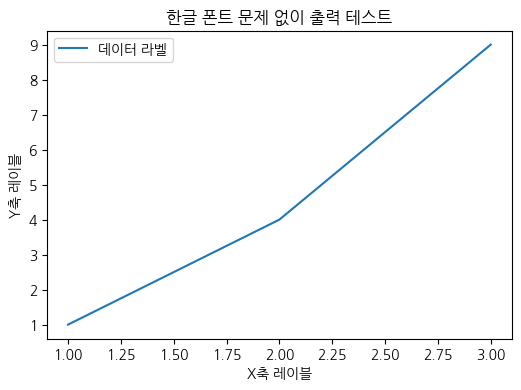

In [54]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import platform
import os
import warnings
import logging
import urllib.request
import tempfile

# ------------------------------------------------------------------
# 0) findfont 로그 끄기
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

# 1) 사용자 경고 중 ‘Glyph … missing from font’ 메시지 숨기기
warnings.filterwarnings(
    "ignore",
    message="Glyph .* missing from font.*",
    category=UserWarning,
)

def find_hangul_font():
    system = platform.system()
    candidates = []
    if system == 'Windows':
        candidates.append(os.path.join(os.environ.get('WINDIR', 'C:\\Windows'), 'Fonts', 'malgun.ttf'))
    elif system == 'Darwin':
        candidates.append('/Library/Fonts/AppleGothic.ttf')
    elif system == 'Linux':
        candidates.extend([
            '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
            '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
        ])
    for path in candidates:
        if os.path.exists(path):
            return path
    return None

# 2) 한글 폰트 찾기
font_path = find_hangul_font()

# 3) 없으면 NanumGothic 다운로드
if not font_path:
    print("[INFO] 한글 폰트를 찾을 수 없어 다운로드를 시도합니다...")
    try:
        url = "https://github.com/google/fonts/raw/main/ofl/nanumgothic/NanumGothic-Regular.ttf"
        tmp_dir = tempfile.gettempdir()
        font_path = os.path.join(tmp_dir, "NanumGothic-Regular.ttf")
        urllib.request.urlretrieve(url, font_path)
        print(f"[INFO] 폰트 다운로드 완료: {font_path}")
    except Exception as e:
        warnings.warn(f"폰트 다운로드에 실패했습니다: {e}\n시스템 기본 폰트를 사용합니다.", UserWarning)
        font_path = None

# 4) Matplotlib에 폰트 등록 및 설정
if font_path and os.path.exists(font_path):
    # addfont 로더에 추가
    fm.fontManager.addfont(font_path)
    prop = fm.FontProperties(fname=font_path)
    font_name = prop.get_name()
    # 기본 폰트 패밀리로 설정
    mpl.rcParams['font.family'] = font_name
    # sans-serif 계열을 오직 이 폰트로만 지정
    mpl.rcParams['font.sans-serif'] = [font_name]
    print(f"[INFO] 한글 폰트를 사용합니다: {font_name} ({font_path})")
else:
    # fallback: 시스템 sans-serif (DejaVu Sans 제거)
    mpl.rcParams['font.family'] = 'sans-serif'
    mpl.rcParams['font.sans-serif'] = ['Arial', 'Helvetica']
    print("[INFO] 시스템 기본 sans-serif 폰트를 사용합니다.")

# 5) 마이너스 기호 깨짐 방지
mpl.rcParams['axes.unicode_minus'] = False

# 6) 테스트 플롯
plt.figure(figsize=(6,4))
plt.title('한글 폰트 문제 없이 출력 테스트')
plt.plot([1,2,3], [1,4,9], label='데이터 라벨')
plt.xlabel('X축 레이블')
plt.ylabel('Y축 레이블')
plt.legend()
plt.show()


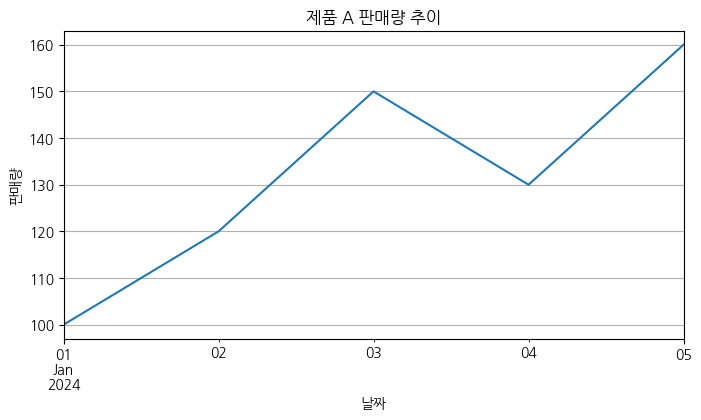

In [56]:
# 제품 A의 판매량 추이 (선 그래프)
df_s_plot['product_A_sales'].plot(kind='line', title='제품 A 판매량 추이', figsize=(8, 4))
plt.ylabel('판매량')
plt.xlabel('날짜')
plt.grid(True) # 그리드 추가
plt.show() # Jupyter Notebook 외부 환경에서는 필수

**Pandas `.plot()` - 막대 그래프 (Bar Plot)**

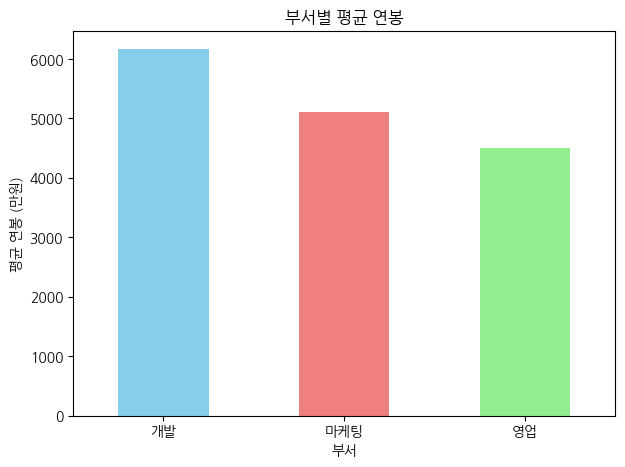

In [57]:
# 부서별 평균 연봉 (막대 그래프)
dept_avg_salary_plot = df_emp_plot.groupby('부서')['연봉'].mean()
dept_avg_salary_plot.plot(kind='bar', title='부서별 평균 연봉', figsize=(7, 5), color=['skyblue', 'lightcoral', 'lightgreen'])
plt.ylabel('평균 연봉 (만원)')
plt.xlabel('부서')
plt.xticks(rotation=0) # x축 레이블 회전 방지
plt.show()

**Pandas `.plot()` - 히스토그램 (Histogram)**

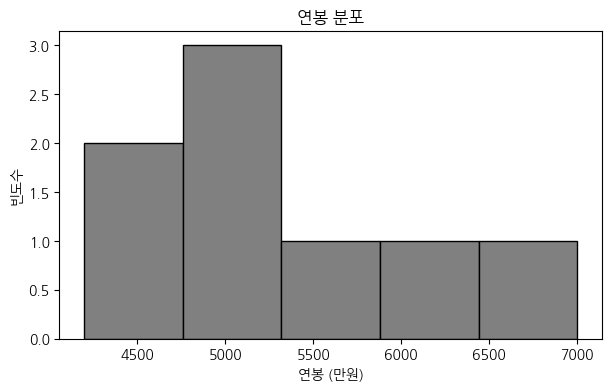

In [58]:
# 연봉 분포 (히스토그램)
df_emp_plot['연봉'].plot(kind='hist', bins=5, title='연봉 분포', figsize=(7, 4), color='gray', edgecolor='black')
plt.xlabel('연봉 (만원)')
plt.ylabel('빈도수')
plt.show()

**Pandas `.plot()` - 산점도 (Scatter Plot) - DataFrame.plot 사용**

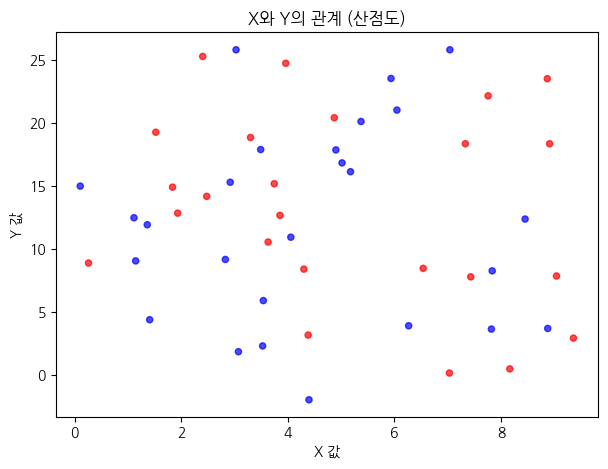

In [59]:
# 예제용 산점도 데이터
df_scatter_data = pd.DataFrame({
    'x_values': np.random.rand(50) * 10,
    'y_values': 2.5 * (np.random.rand(50) * 10) + np.random.randn(50) * 2, # y = 2.5x + noise
    'category': np.random.choice(['Cat1', 'Cat2'], size=50)
})

# 색상 지정을 위한 매핑
color_map = {'Cat1': 'blue', 'Cat2': 'red'}
df_scatter_data.plot(kind='scatter', x='x_values', y='y_values',
                     c=df_scatter_data['category'].map(color_map), # 카테고리별 색상
                     title='X와 Y의 관계 (산점도)', figsize=(7,5), alpha=0.7)
plt.xlabel('X 값')
plt.ylabel('Y 값')
plt.show()

##### ✏️ 연습 문제 (Practice Problems)

1.  `df_s_plot` (시계열 판매 데이터)에서 'product\_A\_sales'와 'product\_B\_sales'를 **하나의 선 그래프**에 함께 그려서 두 제품의 판매량 추이를 비교하세요. (범례가 나타나도록 해보세요.)

In [ ]:
# 연습 문제 1번 풀이 공간

2.  `df_emp` (Part 1에서 사용한 직원 데이터)에서 '도시'별 직원 수를 막대 그래프로 시각화하세요.

In [ ]:
# 연습 문제 2번 풀이 공간
# df_emp는 Part 1 또는 Part 2의 6번 항목에서 생성됨


3.  `df_ts` (Part 2의 8번 항목 시계열 예제 데이터)의 'value' 컬럼에 대해 박스 플롯(box plot)을 그려 데이터의 분포를 확인하세요.

In [61]:
# 연습 문제 3번 풀이 공간
# df_ts는 Part 2의 8번 항목에서 생성


-----

이것으로 Pandas 튜토리얼 Part 2를 마무리합니다.

이 외에도 Pandas는 매우 방대하고 다양한 기능을 제공하므로,

공식 문서나 다른 자료를 통해 지속적으로 학습하시는 것이 좋습니다.

꾸준한 실습을 통해 데이터 분석 능력을 키워나가시길 바랍니다! 🎉

<br/>
- 단테 -